In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('250google_vector.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,class,word
0,-0.181641,0.165039,-0.166016,0.357422,-0.092285,0.201172,-0.054688,-0.261719,-0.172852,-0.080566,...,-0.149414,0.398438,0.092773,0.033936,-0.061523,0.159180,0.127930,0.002228,0,food
1,0.067871,-0.041260,0.100098,0.058838,0.054443,0.017578,0.072266,-0.091309,0.072266,0.122559,...,-0.150391,0.175781,0.106445,0.157227,-0.113281,0.104492,-0.085449,-0.154297,1,service
2,0.121094,0.281250,0.106445,0.025635,-0.112305,0.040527,-0.006622,-0.172852,-0.363281,0.142578,...,-0.064941,0.074707,0.118164,0.185547,0.248047,-0.273438,0.072754,0.013489,2,ambience
3,0.079590,0.018799,0.109375,0.018677,-0.114258,0.120117,0.172852,-0.020630,0.306641,0.267578,...,-0.166016,-0.080078,0.144531,0.398438,0.064453,-0.066406,0.073242,-0.188477,3,value
4,-0.026855,0.081055,-0.171875,0.227539,-0.141602,0.040527,0.229492,-0.227539,-0.332031,0.131836,...,-0.174805,-0.055176,0.197266,0.199219,-0.361328,0.101074,0.142578,0.281250,0,foodstuff


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X=df.iloc[:,0:300].values.tolist()
y=df.iloc[:,300].values.tolist()

In [8]:
knn = KNeighborsClassifier(n_neighbors=22)

In [9]:
k_range = range(1,31)
k_scores = []
max=0
max_number=0
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    if scores.mean() > max:
        max=scores.mean()
        max_number = k_number
print(max)
print(max_number)

0.835
22


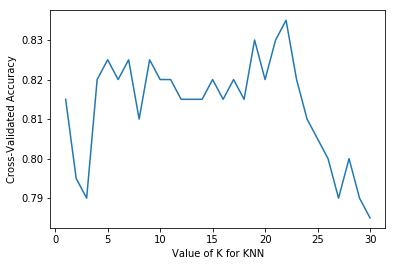

In [7]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()